# Projeto Final - Aprendizado de Máquinas I
# PES 03 - Professor George Darmiton da Cunha Cavalcanti

## Michele Beatriz Lopes Farias
## Rafael Couto de Oliveira
---

# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 1.0 Carregando dados

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data?select=train.csv


Ela classifica o preço de telefones celulares como: low cost, medium cost, high cost e very high cost de acordo com algumas características de cada aparelho

Dados disponiveis em duas amostras: Treino e teste..

In [2]:
df= pd.read_csv('train.csv')

teste = pd.read_csv('test.csv')

# 2.0 Pre processamento dos dados

## 2.1 Tamanho dos dados

In [3]:
print (f'Número de linhas: {df.shape[0]}')
print (f'Número de colunas: {df.shape[1]}')

Número de linhas: 2000
Número de colunas: 21


## 2.2 Data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 2.3 Verificação de valores nulos

In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 2.4 Ajuste das colunas

### 2.4.1 Renomeando as colunas

Battery_power : capacity in mAh


blue : Has bluetooth or not


clock_speed : speed at which microprocessor executes instructions


dual_sim : Has dual sim support or not


fc : Front Camera mega pixels

four_g : Is 4g or not

int_memory : Internal Memory in Gigabytes

m_dep : mob depth in cms

mobile_wt : weight of phone in gms

n_cores : Number of cores of processor

pc : primary camera megapixels

px_height : pixel resolution height

px_width : pixel resolution width

ram : capacity

sc_h : screen height

sc_w : screen width

talk_time : in hrs

three_g : Is 3g or not

touch_screen : is touch screen or not

wifi : has wifi or not
price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost). **

### 2.4.2 Ajustando tipo das colunas

In [7]:
# Converter colunas para booleano
colunas_bool = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df[colunas_bool] = df[colunas_bool].astype('boolean')

# Converter coluna 'price_range' para categoria
df['price_range'] = df['price_range'].astype('category')

## 2.6 Feature Engineering

# 3.0 Descrição dos dados

In [8]:
# Ajustar a configuração de exibição para mostrar todas as colunas
pd.set_option('display.max_columns', None)
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


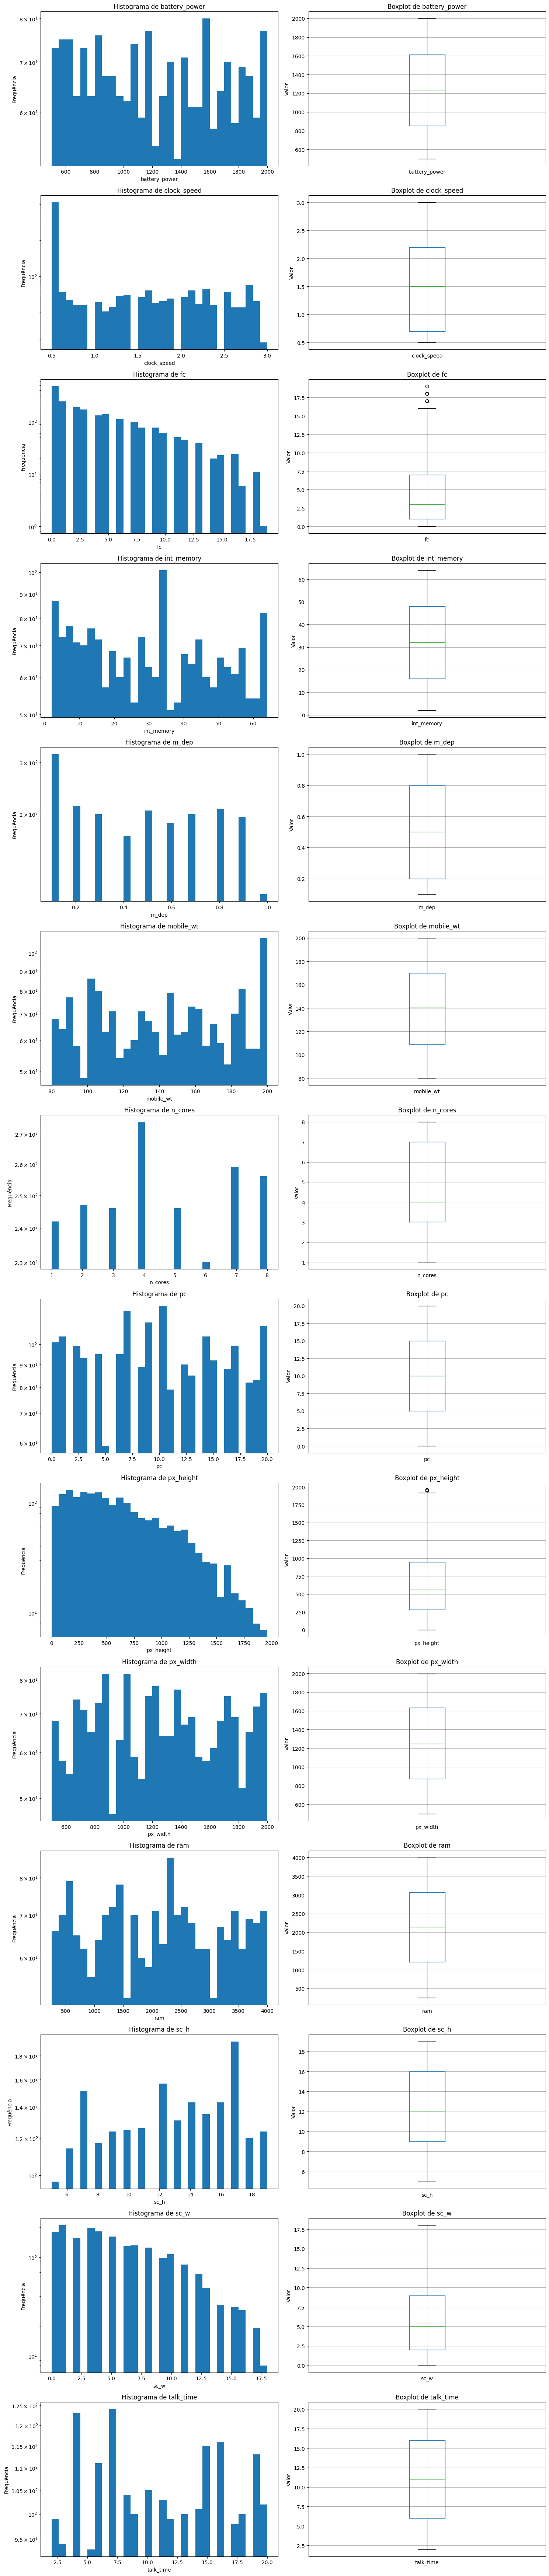

In [9]:
# Selecionando apenas as colunas numericas
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

#calculando numero de linhas do plot
nlinhas = len(colunas_numericas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=nlinhas, ncols=2, figsize=(15, 5*nlinhas))


# Plotar um histograma e boxplot para cada coluna numérica
for i, col in enumerate(colunas_numericas):
    #plot do histograma
    ax_hist = axes[i, 0]
    df[col].plot(kind='hist', bins=30, ax=ax_hist, title=f'Histograma de {col}', log=True)
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequência')
    
    # Plotar o boxplot
    ax_box = axes[i, 1]
    df.boxplot(column=col, ax=ax_box)
    ax_box.set_title(f'Boxplot de {col}')
    ax_box.set_xlabel('')
    ax_box.set_ylabel('Valor')

# Ajustar o layout
plt.tight_layout()
plt.show()

## 3.2 Dados categóricos

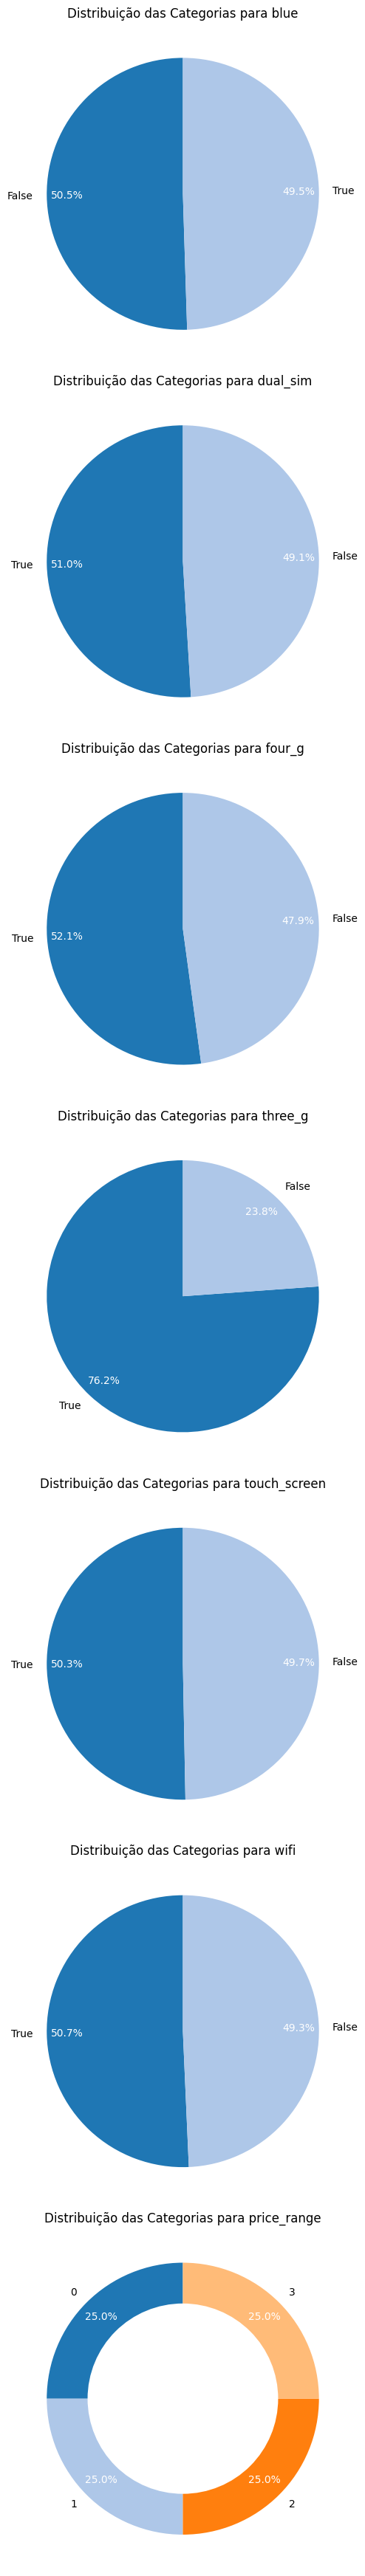

In [10]:
# Selecionando apenas as colunas categóricas
colunas_categoricas = df.select_dtypes(include=['bool', 'category']).columns.tolist()

#calculando numero de linhas do plot
nlinhas = len(colunas_categoricas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=nlinhas, figsize=(15, 5*nlinhas))


# Plotar um gráfico de pizza para cada coluna categórica
for i, col in enumerate(colunas_categoricas):
    ax = axes[i]
    value_counts = df[col].value_counts()
    sizes = value_counts.values
    labels = value_counts.index

    # Gráfico de Pizza
    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85,
        colors=plt.get_cmap('tab20').colors  # Usando uma colormap para cores variadas
    )

    # Adicionar valores diretamente nas fatias
    for text in autotexts:
        text.set_color('white')

    # Adicionar um círculo branco no centro para um visual de donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax.set_title(f'Distribuição das Categorias para {col}')

# Ajustar o layout
plt.tight_layout()
plt.show()

## 3.3  Correlação entre os dados

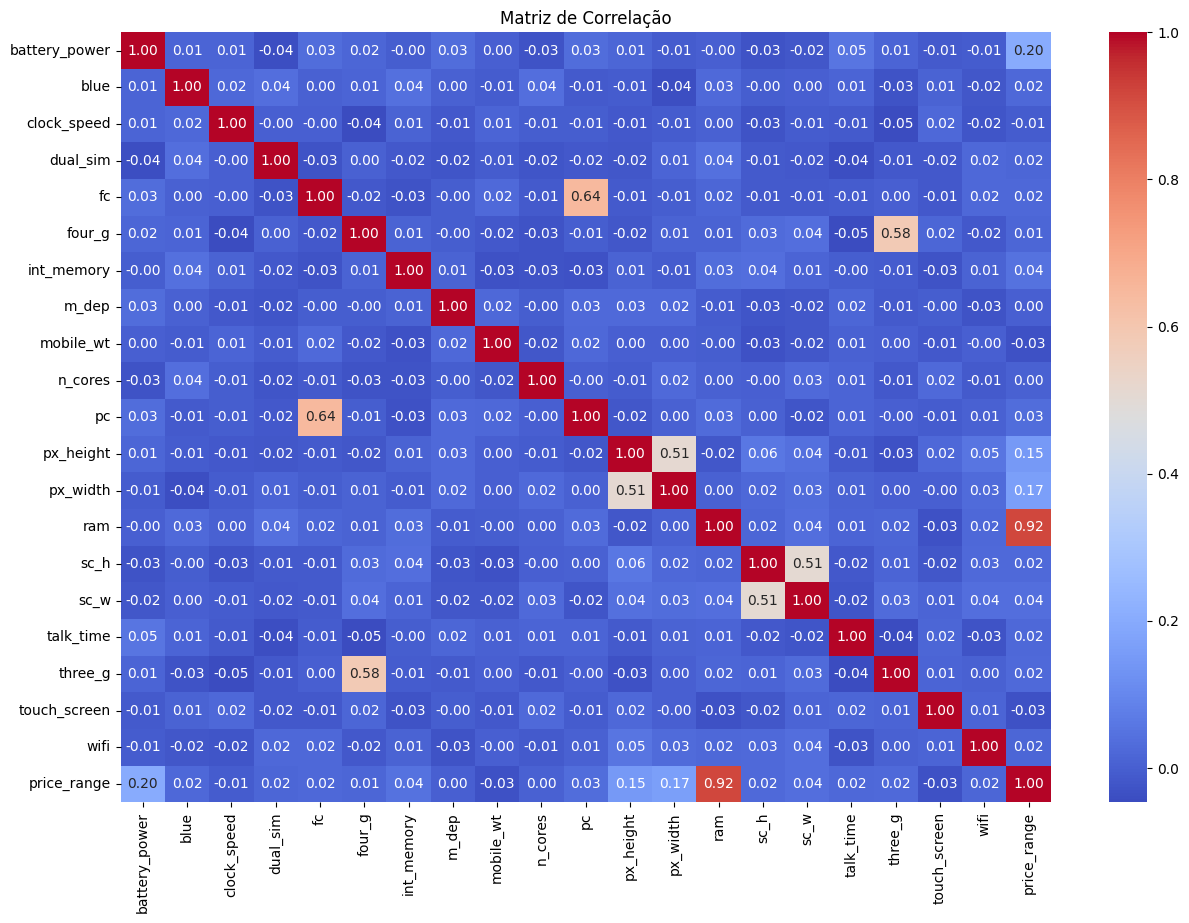

In [11]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

## 3.4  Distribuição por target



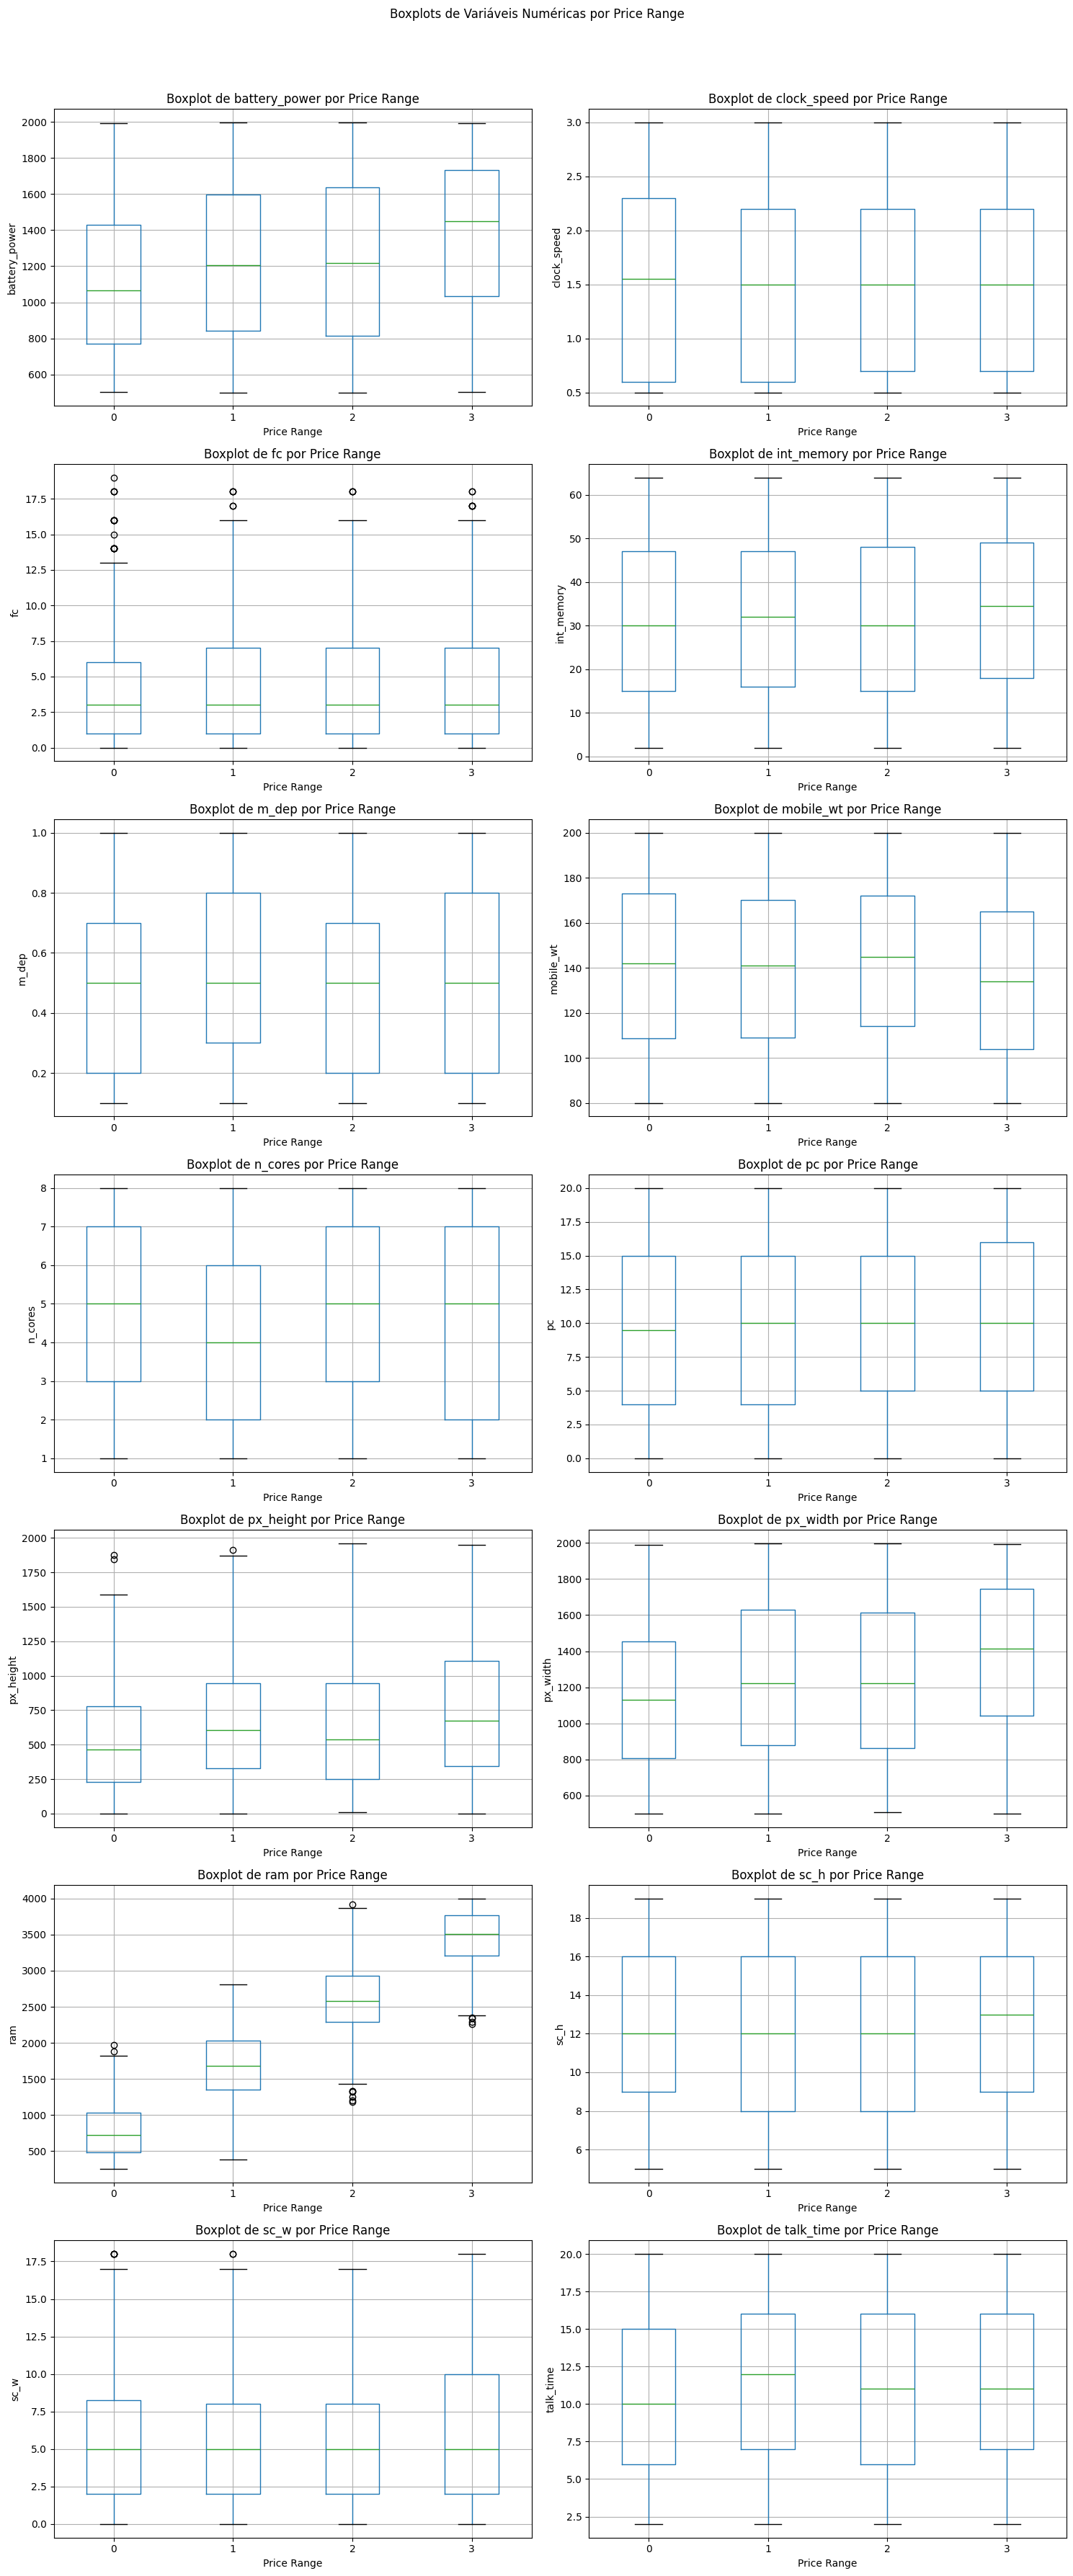

In [12]:
## plotar boxplot dos 4 targets por coluna
# Selecionar apenas as colunas numéricas (excluindo 'price_range')
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Calculando o número de linhas para o grid de subplots
nlinhas = len(colunas_numericas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=(nlinhas+1) // 2, ncols=2, figsize=(15, 5 * ((nlinhas + 1) // 2)))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten() if nlinhas > 1 else [axes]

# Plotar um boxplot para cada variável numérica
for i, col in enumerate(colunas_numericas):
    ax = axes[i]
    df.boxplot(column=col, by='price_range', ax=ax)
    ax.set_title(f'Boxplot de {col} por Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(col)

# Remover os subplots não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.suptitle('Boxplots de Variáveis Numéricas por Price Range', y=1.02)
plt.tight_layout()
plt.show()

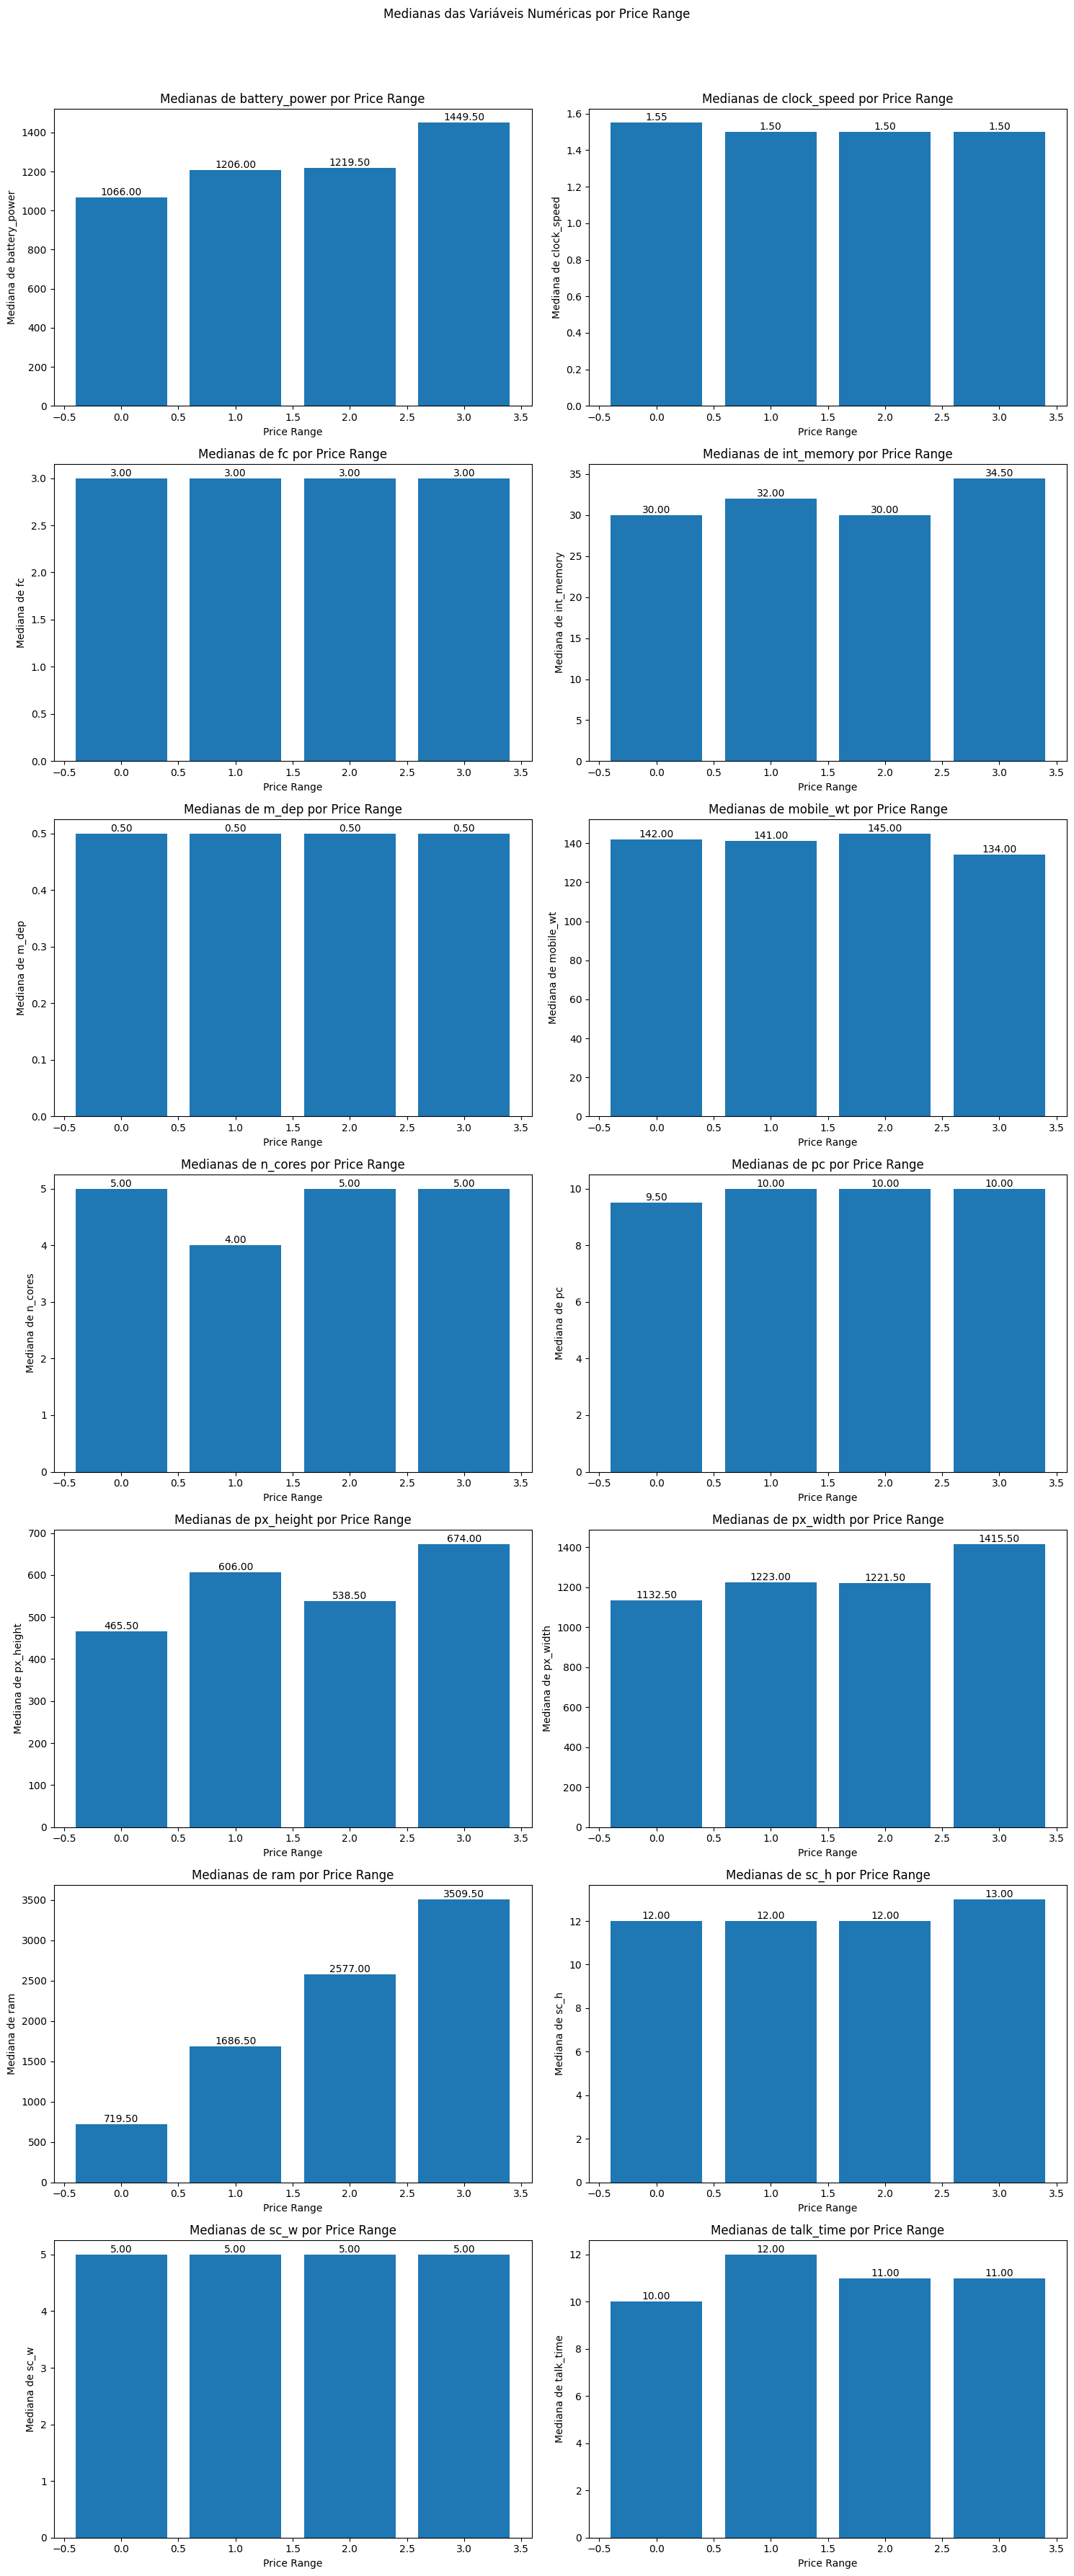

In [13]:
# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=(nlinhas + 1) // 2, ncols=2, figsize=(15, 5 * ((nlinhas + 1) // 2)))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten() if nlinhas > 1 else [axes]

# Plotar gráficos de barras para as medianas de cada variável numérica
for i, col in enumerate(colunas_numericas):
    ax = axes[i]
    
    # Calcular medianas por price_range
    medians = df.groupby('price_range', observed=False)[col].median().reset_index()
    
    # Plotar gráfico de barras
    ax.bar(medians['price_range'], medians[col])
    ax.set_title(f'Medianas de {col} por Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(f'Mediana de {col}')
    
    # Adicionar valores nas barras
    for j, value in enumerate(medians[col]):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom')

# Remover os subplots não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.suptitle('Medianas das Variáveis Numéricas por Price Range', y=1.02)
plt.tight_layout()
plt.show()

# 4.0 Preparação dos dados

In [14]:
df1 = df.copy()

## 4.1 Rescaling

In [15]:
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [16]:
rs = RobustScaler()
mms = MinMaxScaler()

# Para variáveis que apresentaram outliers vamos usar o RobustScaler
df1['fc'] = rs.fit_transform( df1[['fc']].values )
df1['px_height'	] = rs.fit_transform( df1[['px_height'	]].values )

# Para variáveis que não apresentaram outliers vamos usar o MinMacscaler
df1['battery_power'] = mms.fit_transform( df1[['battery_power']].values )
df1['clock_speed'] = mms.fit_transform(df1[['clock_speed']].values)
df1['int_memory'] = mms.fit_transform(df1[['int_memory']].values)
df1['m_dep'] = mms.fit_transform(df1[['m_dep']].values)
df1['mobile_wt'] = mms.fit_transform(df1[['mobile_wt']].values)
df1['n_cores'] = mms.fit_transform(df1[['n_cores']].values)
df1['pc'] = mms.fit_transform(df1[['pc']].values)
df1['px_width'] = mms.fit_transform(df1[['px_width']].values)
df1['ram'] = mms.fit_transform(df1[['ram']].values)
df1['sc_h'] = mms.fit_transform(df1[['sc_h']].values)
df1['sc_w'] = mms.fit_transform(df1[['sc_w']].values)
df1['talk_time'] = mms.fit_transform(df1[['talk_time']].values)


In [17]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,False,0.68,False,-0.333333,False,0.080645,0.555556,0.900000,0.142857,0.10,-0.818661,0.170895,0.612774,0.285714,0.388889,0.944444,False,False,True,1
1,0.347361,True,0.00,True,-0.500000,True,0.822581,0.666667,0.466667,0.285714,0.30,0.513168,0.993324,0.634687,0.857143,0.166667,0.277778,True,True,False,2
2,0.041416,True,0.00,True,-0.166667,True,0.629032,0.888889,0.541667,0.571429,0.30,1.051919,0.811749,0.627205,0.428571,0.111111,0.388889,True,True,False,2
3,0.076152,True,0.80,False,-0.500000,False,0.129032,0.777778,0.425000,0.714286,0.45,0.981189,0.858478,0.671566,0.785714,0.444444,0.500000,True,False,False,2
4,0.881764,True,0.28,False,1.666667,True,0.677419,0.555556,0.508333,0.142857,0.70,0.969150,0.475300,0.308658,0.214286,0.111111,0.722222,True,True,False,1


# 5.0 Feature Selection

## 5.1 Split dataframe into training and test

In [18]:
# Armazenando a variável alvoem X e os atributos em y
X = df1.drop('price_range', axis=1)
y = df1['price_range']

# Configurar KFold para 10 folds
kfold = KFold(n_splits=10, shuffle=True)


# 6.0 Machine Learning Modelling

## 6.1 KNN model

In [19]:
# Valores de k a serem testados
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

# Armazenar resultados
results = []

# Loop para cada valor de k
for k in k_values:
    # Inicializar o modelo KNN com o valor de k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Armazenar as métricas para o k atual
    roc_auc_scores = []
    f1_scores = []
    accuracy_scores = []
    conf_matrices = []
    # Validar cruzado e calcular as métricas
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        y_proba = knn.predict_proba(X_test)
        
        # Binarizar as classes
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        
        # Garantir que y_proba tenha a forma correta
        if y_proba.ndim == 1:
            # Se y_proba é unidimensional, binarizar manualmente
            y_proba_bin = np.vstack([1 - y_proba, y_proba]).T
        else:
            y_proba_bin = y_proba
        
        # Calcular o ROC AUC para problemas multiclasse
        roc_auc_scores.append(roc_auc_score(y_test_bin, y_proba_bin, average='macro', multi_class='ovr'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        conf_matrices.append(confusion_matrix(y_test, y_pred))

     # Calcular a média e o desvio padrão das métricas
    mean_roc_auc = np.mean(roc_auc_scores)
    std_roc_auc = np.std(roc_auc_scores)
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    mean_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)
    
    # Adicionar resultados à lista
    results.append({
        'k': k,
        'Mean ROC AUC': mean_roc_auc,
        'Std ROC AUC': std_roc_auc,
        'Mean F1 Score': mean_f1,
        'Std F1 Score': std_f1,
        'Mean Accuracy': mean_accuracy,
        'Std Accuracy': std_accuracy
    })

# Converter resultados para DataFrame
results_df = pd.DataFrame(results)
# Printar os resultados
print(results_df)

    k  Mean ROC AUC  Std ROC AUC  Mean F1 Score  Std F1 Score  Mean Accuracy  \
0   3      0.635784     0.023208       0.377138      0.017842         0.3825   
1   5      0.647850     0.019430       0.399685      0.016558         0.3985   
2   7      0.664595     0.017731       0.404533      0.033806         0.4025   
3   9      0.673006     0.026969       0.419233      0.043459         0.4165   
4  11      0.681784     0.025341       0.417567      0.040113         0.4155   
5  13      0.688831     0.019970       0.421536      0.034292         0.4180   
6  15      0.700086     0.024109       0.440474      0.035630         0.4375   
7  17      0.707864     0.024111       0.450514      0.040863         0.4480   
8  19      0.714295     0.021072       0.458158      0.037461         0.4545   
9  21      0.717814     0.012090       0.455734      0.029397         0.4540   

   Std Accuracy  
0      0.018742  
1      0.017896  
2      0.032882  
3      0.044892  
4      0.036909  
5      0.03

## 6.2 DecisionTreeClassifier

In [20]:
# Configurar o modelo e o método de validação cruzada

Max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# Armazenar resultados
results = []

# Loop para cada valor de k
for max in Max_depth:
    # Inicializar o modelo KNN com o valor de k
    dt = DecisionTreeClassifier(max_depth=max)

    # Armazenar as métricas para o k atual
    roc_auc_scores = []
    f1_scores = []
    accuracy_scores = []
    conf_matrices = []
    # Validar cruzado e calcular as métricas
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        y_proba = dt.predict_proba(X_test)
        
        # Binarizar as classes
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        
        # Garantir que y_proba tenha a forma correta
        if y_proba.ndim == 1:
            # Se y_proba é unidimensional, binarizar manualmente
            y_proba_bin = np.vstack([1 - y_proba, y_proba]).T
        else:
            y_proba_bin = y_proba
        
        # Calcular o ROC AUC para problemas multiclasse
        roc_auc_scores.append(roc_auc_score(y_test_bin, y_proba_bin, average='macro', multi_class='ovr'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        conf_matrices.append(confusion_matrix(y_test, y_pred))

     # Calcular a média e o desvio padrão das métricas
    mean_roc_auc = np.mean(roc_auc_scores)
    std_roc_auc = np.std(roc_auc_scores)
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    mean_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)
    
    # Adicionar resultados à lista
    results.append({
        'Max_depth': max,
        'Mean ROC AUC': mean_roc_auc,
        'Std ROC AUC': std_roc_auc,
        'Mean F1 Score': mean_f1,
        'Std F1 Score': std_f1,
        'Mean Accuracy': mean_accuracy,
        'Std Accuracy': std_accuracy
    })

# Converter resultados para DataFrame
results_df = pd.DataFrame(results)
# Printar os resultados
print(results_df)

     k  Mean ROC AUC  Std ROC AUC  Mean F1 Score  Std F1 Score  Mean Accuracy  \
0    1      0.772649     0.016811       0.334923      0.031897         0.4990   
1    2      0.890785     0.012881       0.752124      0.024658         0.7520   
2    3      0.922142     0.010224       0.761349      0.022102         0.7605   
3    4      0.943662     0.008358       0.806855      0.016288         0.8075   
4    5      0.952481     0.011585       0.827192      0.026643         0.8265   
5    6      0.940590     0.016699       0.831980      0.023897         0.8320   
6    7      0.923508     0.016218       0.841961      0.033674         0.8415   
7    8      0.905760     0.028462       0.846514      0.036868         0.8465   
8    9      0.905278     0.009741       0.847727      0.013496         0.8480   
9   10      0.889868     0.010876       0.827962      0.020476         0.8270   
10  11      0.889604     0.013829       0.834498      0.019963         0.8340   
11  12      0.889757     0.0

## 6.3  MLPClassifier

In [ ]:
# Valores de neurônios na camada oculta a serem testados
hidden_layer_sizes = [(10,), (50,), (100,), (150,), (200,)]

# Armazenar resultados
results = []

# Loop para cada valor de neurônios na camada oculta
for hls in hidden_layer_sizes:
    # Inicializar o modelo MLP com o valor atual de hidden_layer_sizes
    print(f"Treinando MLP com hidden_layer_sizes={hls}...")
    mlp = MLPClassifier(hidden_layer_sizes=hls, max_iter=2000)
    
    # Armazenar as métricas para o hls atual
    roc_auc_scores = []
    f1_scores = []
    accuracy_scores = []
    conf_matrices = []
    
    # Validar cruzado e calcular as métricas
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        y_proba = mlp.predict_proba(X_test)
        
        # Binarizar as classes
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        
        # Garantir que y_proba tenha a forma correta
        if y_proba.ndim == 1:
            # Se y_proba é unidimensional, binarizar manualmente
            y_proba_bin = np.vstack([1 - y_proba, y_proba]).T
        else:
            y_proba_bin = y_proba
        
        # Calcular o ROC AUC para problemas multiclasse
        roc_auc_scores.append(roc_auc_score(y_test_bin, y_proba_bin, average='macro', multi_class='ovr'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        conf_matrices.append(confusion_matrix(y_test, y_pred))
    
    # Calcular a média e o desvio padrão das métricas
    mean_roc_auc = np.mean(roc_auc_scores)
    std_roc_auc = np.std(roc_auc_scores)
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    mean_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)
    
    # Adicionar resultados à lista
    results.append({
        'Hidden Layer Sizes': hls,
        'Mean ROC AUC': mean_roc_auc,
        'Std ROC AUC': std_roc_auc,
        'Mean F1 Score': mean_f1,
        'Std F1 Score': std_f1,
        'Mean Accuracy': mean_accuracy,
        'Std Accuracy': std_accuracy
    })

# Converter resultados para DataFrame
results_df = pd.DataFrame(results)

# Printar os resultados
print(results_df)

## 6.4 GaussianNB

In [23]:
gnb = GaussianNB()
# Valores de C a serem testados
var_smoothing=[1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

# Armazenar resultados
results = []

# Loop para cada valor de C
for var in var_smoothing:
    # Inicializar o modelo SVM com o valor de C atual
    gnb = GaussianNB(var_smoothing=var)
    
    # Armazenar as métricas para o c_value atual
    roc_auc_scores = []
    f1_scores = []
    accuracy_scores = []
    conf_matrices = []
    
    # Validar cruzado e calcular as métricas
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        gnb.fit(X_train, y_train)
        y_pred = gnb.predict(X_test)
        y_proba = gnb.predict_proba(X_test)
        
        # Binarizar as classes
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        
        # Garantir que y_proba tenha a forma correta
        if y_proba.ndim == 1:
            # Se y_proba é unidimensional, binarizar manualmente
            y_proba_bin = np.vstack([1 - y_proba, y_proba]).T
        else:
            y_proba_bin = y_proba
        
        # Calcular o ROC AUC para problemas multiclasse
        roc_auc_scores.append(roc_auc_score(y_test_bin, y_proba_bin, average='macro', multi_class='ovr'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        conf_matrices.append(confusion_matrix(y_test, y_pred))
    
    # Calcular a média e o desvio padrão das métricas
    mean_roc_auc = np.mean(roc_auc_scores)
    std_roc_auc = np.std(roc_auc_scores)
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    mean_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)
    
    # Adicionar resultados à lista
    results.append({
        'var_smoothing': var,
        'Mean ROC AUC': mean_roc_auc,
        'Std ROC AUC': std_roc_auc,
        'Mean F1 Score': mean_f1,
        'Std F1 Score': std_f1,
        'Mean Accuracy': mean_accuracy,
        'Std Accuracy': std_accuracy
    })

# Converter resultados para DataFrame
results_df = pd.DataFrame(results)

# Printar os resultados
print(results_df)

   var_smoothing  Mean ROC AUC  Std ROC AUC  Mean F1 Score  Std F1 Score  \
0   1.000000e-09      0.950625     0.010310       0.807557      0.024550   
1   1.000000e-08      0.951171     0.010673       0.813095      0.035364   
2   1.000000e-07      0.950724     0.012430       0.804692      0.030201   
3   1.000000e-06      0.950268     0.014924       0.810654      0.033673   
4   1.000000e-05      0.950041     0.009344       0.808465      0.023641   

   Mean Accuracy  Std Accuracy  
0         0.8075      0.024622  
1         0.8130      0.034147  
2         0.8040      0.030968  
3         0.8100      0.033615  
4         0.8080      0.023791  


## 6.5 SVM

In [22]:
# Valores de C a serem testados
C_values = [0.1, 1, 10, 100]

# Armazenar resultados
results = []

# Loop para cada valor de C
for c_value in C_values:
    # Inicializar o modelo SVM com o valor de C atual
    svc = SVC(C=c_value, probability=True, random_state=42)
    
    # Armazenar as métricas para o c_value atual
    roc_auc_scores = []
    f1_scores = []
    accuracy_scores = []
    conf_matrices = []
    
    # Validar cruzado e calcular as métricas
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        y_proba = svc.predict_proba(X_test)
        
        # Binarizar as classes
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        
        # Garantir que y_proba tenha a forma correta
        if y_proba.ndim == 1:
            # Se y_proba é unidimensional, binarizar manualmente
            y_proba_bin = np.vstack([1 - y_proba, y_proba]).T
        else:
            y_proba_bin = y_proba
        
        # Calcular o ROC AUC para problemas multiclasse
        roc_auc_scores.append(roc_auc_score(y_test_bin, y_proba_bin, average='macro', multi_class='ovr'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        conf_matrices.append(confusion_matrix(y_test, y_pred))
    
    # Calcular a média e o desvio padrão das métricas
    mean_roc_auc = np.mean(roc_auc_scores)
    std_roc_auc = np.std(roc_auc_scores)
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    mean_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)
    
    # Adicionar resultados à lista
    results.append({
        'C': c_value,
        'Mean ROC AUC': mean_roc_auc,
        'Std ROC AUC': std_roc_auc,
        'Mean F1 Score': mean_f1,
        'Std F1 Score': std_f1,
        'Mean Accuracy': mean_accuracy,
        'Std Accuracy': std_accuracy
    })

# Converter resultados para DataFrame
results_df = pd.DataFrame(results)

# Printar os resultados
print(results_df)

       C  Mean ROC AUC  Std ROC AUC  Mean F1 Score  Std F1 Score  \
0    0.1      0.870784     0.018364       0.515672      0.050825   
1    1.0      0.972810     0.005121       0.841565      0.020698   
2   10.0      0.973455     0.008131       0.844767      0.024175   
3  100.0      0.975913     0.008208       0.851058      0.034646   

   Mean Accuracy  Std Accuracy  
0         0.5290      0.032388  
1         0.8405      0.020427  
2         0.8450      0.023979  
3         0.8510      0.034986  
